### Student Information
Name: 簡子昀

Student ID: 109062617

GitHub ID: tychien1998

Kaggle name: Tzu-Yun Chien

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

## Part1 - take home exercises

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [5]:
# Answer here
from helper import *
N = 30
# Prepare BOW matrix
train_vect = CountVectorizer(max_features=N)
train_BOW_top_30 = train_vect.fit_transform(train_df['text'])

test_vect = CountVectorizer(max_features=N)
test_BOW_top_30 = test_vect.fit_transform(test_df['text'])

In [6]:
def get_term_frequencies(matrix):
    term_freq = []

    for t in matrix.T:
        term_freq.append(t.toarray().sum())

    return term_freq

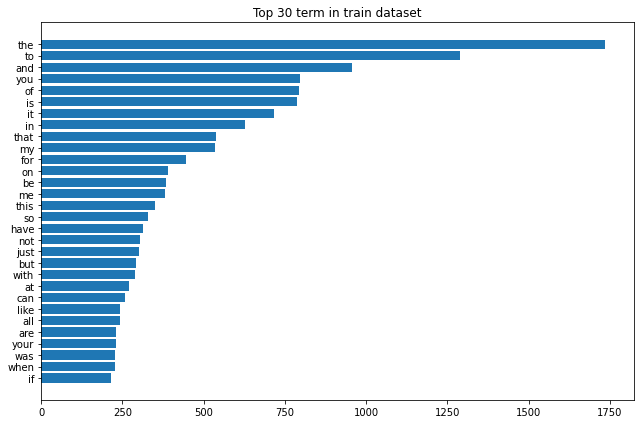

In [7]:
index = np.arange(N)
    
train_top_30_term_freq = get_term_frequencies(train_BOW_top_30)
train_top_30_term = []

for i in np.argsort(train_top_30_term_freq)[::-1]:
    train_top_30_term.append(train_vect.get_feature_names()[i])
y = np.sort(train_top_30_term_freq)[::-1]

fig = plt.figure(figsize=(9, 6))
ax = fig.subplots()

ax.set_title('Top 30 term in train dataset')
ax.barh(index, y, align='center', color='tab:blue')
ax.set_yticks(index)
ax.set_yticklabels(train_top_30_term)
ax.invert_yaxis()

fig.tight_layout()
plt.show()


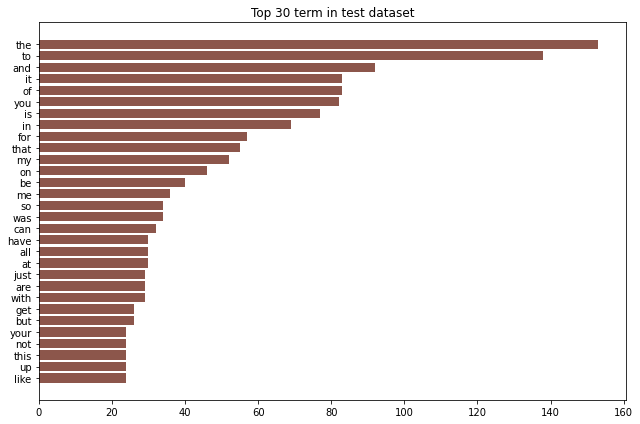

In [8]:
index = np.arange(N)
    
test_top_30_term_freq = get_term_frequencies(test_BOW_top_30)
test_top_30_term = []

for i in np.argsort(test_top_30_term_freq)[::-1]:
    test_top_30_term.append(test_vect.get_feature_names()[i])
y = np.sort(test_top_30_term_freq)[::-1]

fig = plt.figure(figsize=(9, 6))
ax = fig.subplots()

ax.set_title('Top 30 term in test dataset')
ax.barh(index, y, align='center', color='tab:brown')
ax.set_yticks(index)
ax.set_yticklabels(test_top_30_term)
ax.invert_yaxis()

fig.tight_layout()
plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [9]:
# Answer here
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

TFIDF_1000.fit(train_df['text'])
train_data_TFIDF_1000 = TFIDF_1000.transform(train_df['text'])

train_data_TFIDF_1000.shape

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 1000)

In [10]:
feature_names_1000 = TFIDF_1000.get_feature_names()
feature_names_1000[100:110]

['awareness',
 'away',
 'awe',
 'awesome',
 'awful',
 'b',
 'baby',
 'back',
 'bad',
 'ball']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

#### Answer here
As mentioned in the class, the Decision Tree classifier has issues of underfitting and overfitting. In the result, we can see that there is a huge accuracy gap between training data and testing data. In this case, our model has the issue of overfitting.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [11]:
# Answer here
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

train_data_BOW_features_500.shape

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

In [12]:
from sklearn.naive_bayes import MultinomialNB

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [13]:
# build and train model
NB_model = MultinomialNB()
NB_model = NB_model.fit(X_train, y_train)

# get predicted result on test data
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

In [14]:
# accuracy evaluation
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.69


In [15]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.72      0.77      0.75       110
         joy       0.76      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347



In [16]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 15  5  9]
 [ 8 85  5 12]
 [10  8 55  6]
 [11 10  7 46]]


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#### Answer here
training accuracy: DT > NB testing accuracy: NB > DT As metioned in exercise 3, the Decision Tree model often has the issue of overfitting. Although the Navie Bayes model get lower accuracy than Decision Tree model in train dataset, it acctually get better result in testing dataset.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [17]:
# Answer here
# import the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.355383,1.334246,0.435158,1.276726
1,1,0.640188,0.999715,0.636888,0.959107
2,2,0.794631,0.588606,0.711816,0.791582
3,3,0.847772,0.422113,0.694524,0.845948
4,4,0.877110,0.342440,0.714697,0.821799


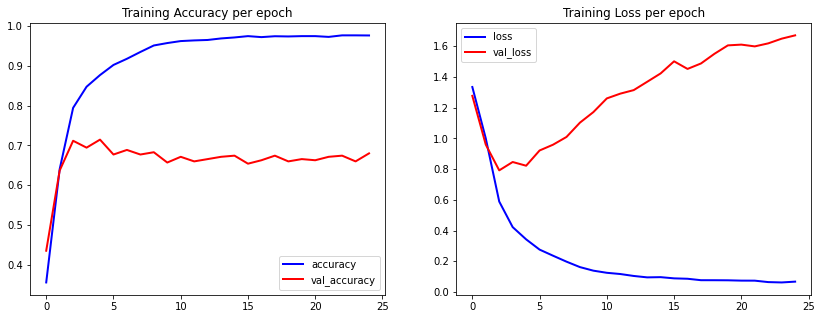

In [18]:
plt.figure(figsize=(14, 5))

# plot training and validation accuracy per epoch
plt.subplot(121)
plt.plot('epoch', 'accuracy', data=training_log, marker='', color='b', linewidth=2)
plt.plot('epoch', 'val_accuracy', data=training_log , marker='', color='r', linewidth=2)

plt.title('Training Accuracy per epoch')
plt.legend()

# plot training and validation loss per epoch
plt.subplot(122)
plt.plot('epoch', 'loss', data=training_log, marker='', color='b', linewidth=2)
plt.plot('epoch', 'val_loss', data=training_log , marker='', color='r', linewidth=2)

plt.title('Training Loss per epoch')
plt.legend()

plt.show()

During the training process, the model tries to minimize the loss and maximize the accuracy in training dataset, as the blue lines shown in the figures above. On the other hand, in the testing dataset, we can see that the accuracy quickly goes up in the first few epoch, which is a sign of underfitting. After the first few epoch, although the model performs better and better in the trainging dataset, the accuracy goes down in the testing dataset, which is a sign of overfitting.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


#### Answer here
1. summarize/average/weighted the word vectors in the sentence.
2. concatenate the word vectors together.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [19]:
# Answer here
from gensim.models import KeyedVectors
import gensim.downloader as api
## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request

## Note: this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632171869277954),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286198616028),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.6360419988632202),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

In [20]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15

angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

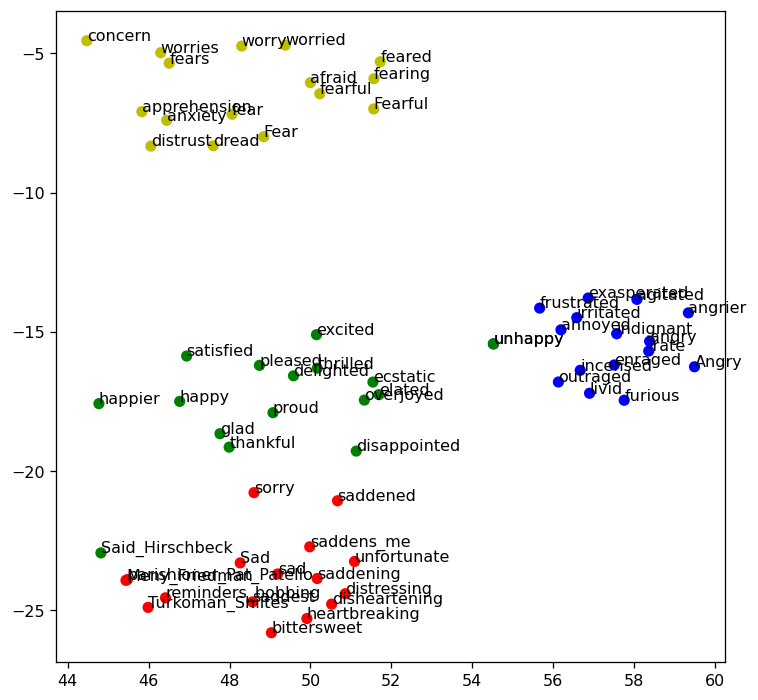

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# w2v model
model = w2v_google_model

# prepare training word vectors
size = 2000
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

# t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

# training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
## Part2 - in-class Kaggle Competition 
- Rank 15 in Private Leaderboard


  <table><tr>
      <td><img src="img/pic0.png" style="width: 1000px;"/> </td>
  </tr></table>

## Part3 - report of your work developping the model for the competition
I use BERT model to do the Emotion Recognition

### Raw data processing
Convert the json raw data into pandas dataframe and concatenated the dataframe with the emotion label, and then save them as pkl files. In the code below will load the data directly from the pkl files.

In [ ]:
import os
import re
import math
import time
import random
from tqdm import tqdm
import numpy as np 
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras.models import Sequential
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertModel
from transformers import BertTokenizer
from transformers import AutoModel, AutoTokenizer
from transformers import AdamW, get_linear_schedule_with_warmup

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [ ]:
data_pth = "kaggle/tweets_DM.json"
sample_pth = "kaggle/sampleSubmission.csv"
emotion_pth = "kaggle/emotion.csv"
identify_pth = "kaggle/data_identification.csv"

In [ ]:
train_data = pd.read_pickle('kaggle/train_data.pkl')
test_data = pd.read_pickle('kaggle/test_data.pkl')

### Observe the amount of each class

In [ ]:
train_data.groupby(['emotion']).count()['text']

### Text preprocessing
Replace some special text by regularize words
- EX: @user ===> USER
- EX: 1234 times ===> NUM times
- EX: email@gmail.com ===> EMAIL

In [ ]:
emailsRegex=re.compile(r'[\w\.-]+@[\w\.-]+')
userMentionsRegex=re.compile(r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)')
urlsRegex=re.compile('r(f|ht)(tp)(s?)(://)(.*)[.|/][^ ]+')
numsRegex=re.compile(r"\b\d+\b")

In [ ]:
def text_preprocessing(text):
    text = re.sub(r"<LH>","", text)
    text = userMentionsRegex.sub(' USER', text)
    text = emailsRegex.sub(' EMAIL', text)
    text = urlsRegex.sub(' URL', text)
    text = numsRegex.sub(' NUM', text)

    return text

In [ ]:
texts = list(train_data['text'])
labels = list(train_data['emotion'])

### Label prerocessing
use `sklearn.preprocessing.LabelEncoder()` to encode the labels

In [ ]:
label_encoder  = preprocessing.LabelEncoder()
label_encoder.fit(labels)
label_classes = label_encoder.classes_

In [ ]:
label = label_encoder.transform(labels)
label = to_categorical(np.asarray(label))

### Preprocessing function - `preprocessing_for_bert(data)`
Perform required preprocessing steps(containing the text prerocessing above) for the pretrained BERT

- input: `data` - Array of texts to be processed.
- output: `input_ids` and `attention_masks` - Tensors to be fed to a model.

The function will use `BERT tokenizer` to tokenize the sentence, add the `[CLS]` and `[SEP]` token to the start and end, truncate/pad sentence to max length, map tokens to their IDs, and create attention mask.

In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


def preprocessing_for_bert(data):
    
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    for sent in tqdm(data):
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=256,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [ ]:
test_texts = list(test_data['text'])

### Split the train dataset for training and validation

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(texts, label, test_size=0.1, random_state=20191118)

In [ ]:
device = 'cuda'
train_inputs, train_masks = preprocessing_for_bert(x_train)
val_inputs, val_masks = preprocessing_for_bert(x_test)

### Create the DataLoaders

In [ ]:
# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_test)

batch_size = 16

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

### Create BertClassifier class
- __init__
  - Specify hidden size of BERT, hidden size of the classifier , and number of labels
  - Load pretrained weight for BERT
  - Use `nn.Sequential` to make an one-layer feed-forward classifier with `Linear` and `ReLU`
- __forward__
  Feed input to BERT and the classifier to compute logits.

In [ ]:
class BertClassifier(nn.Module):

    def __init__(self, freeze_bert=False):
        super(BertClassifier, self).__init__()

        D_in, H, D_out = 768, 50, 8

        self.bert = BertModel.from_pretrained('bert-base-uncased')

        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            nn.Linear(H, D_out)
        )

        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        last_hidden_state_cls = outputs[0][:, 0, :]
        logits = self.classifier(last_hidden_state_cls)

        return logits

### Function `initialize_model`
- Initialize the Bert Classifier and set the model on GPU
- Create the optimizer - `AdamW`
- Set up the learning rate scheduler.

It will return `bert_classifier`, `optimizer`, `scheduler`

In [ ]:
def initialize_model(epochs=4):
    
    bert_classifier = BertClassifier(freeze_bert=False)
    bert_classifier.to(device)


    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    total_steps = len(train_dataloader) * epochs

    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0,
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

### Function `train` and `evaluate`
Functions for training and validation.

The explanations are showing in the cell below with the code as comments.

In [ ]:
# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    
    print("Start training...\n")
    for epoch_i in range(epochs):
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()
        
        print(len(train_dataloader))


        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)
            b_labels = b_labels.long()

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits,torch.max(b_labels, 1)[1])
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 1000 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)

        
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    # Put the model into the evaluation mode.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []
    
    print(len(val_dataloader))


    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)
        b_labels = b_labels.long()

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits,torch.max(b_labels, 1)[1])
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == torch.max(b_labels, 1)[1]).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=1)
train(bert_classifier, train_dataloader, val_dataloader, epochs=1, evaluation=True)

### Function `bert_predict`
Function to perform a forward pass on the trained BERT model to predict probabilities on the test set

The explanations are showing in the cell below with the code as comments.

In [ ]:
def bert_predict(model, test_dataloader):
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []
    
    print(len(test_dataloader))

    for batch in tqdm(test_dataloader):
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
            all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

### Make prediction and save the result

In [ ]:
test_inputs, test_masks = preprocessing_for_bert(test_texts)
test_dataset = TensorDataset(test_inputs, test_masks)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=32)

predict = bert_predict(bert_classifier, test_dataloader)#model.predict([test,m_test],batch_size=100)
pre = np.argmax(predict, axis=1)
result = label_encoder.inverse_transform(pre)


test_data['emotion'] = result

df=test_data.drop(['identification','text'],axis=1)
df.to_csv('test.csv',index=False)
sample_pth = "kaggle/sampleSubmission.csv"
sample = pd.read_csv(sample_pth,index_col='id')
t = pd.read_csv("test.csv",index_col='id')
sample['emotion']=t['emotion']
sample.to_csv('result-test.csv')

### Save the weight

In [ ]:
torch.save(bert_classifier.state_dict(), "bert-test.pt")